In [12]:
import sys  
sys.path.insert(1, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import input_output_layer_sizes, predict, nn_model, tanh, sigmoid, leaky_relu, relu, linear, randomly_initialize_parameters, metrics

In [13]:
df = pd.read_csv("../dataset/apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


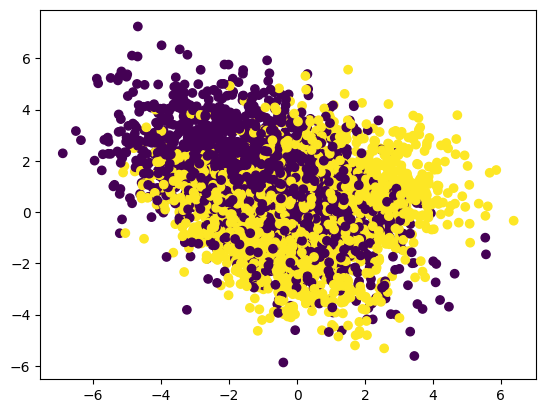

In [14]:
# Plot data 
plt.scatter(df["Sweetness"], df["Ripeness"], c=df["Quality"] == "good")

In [15]:
X_df = df.iloc[:, 1:-1]
y_df = df.iloc[:, -1]
y_df = y_df == "good"

X = X_df.values
y = y_df.values

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(test_size=0.3, random_state=42, n_splits=1)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
sss = StratifiedShuffleSplit(test_size=0.5, random_state=42, n_splits=1)

for test_index, dev_index in sss.split(X_test, y_test):
    X_test, X_dev = X[test_index], X[dev_index]
    y_test, y_dev = y[test_index], y[dev_index]


In [26]:
X_train = X_train.T
y_train = y_train.reshape(1, -1)

X_test = X_test.T
y_test = y_test.reshape(1, -1)

X_dev = X_dev.T
y_dev = y_dev.reshape(1, -1)

In [27]:
import pickle

In [28]:
n_x, n_y = input_output_layer_sizes(X_train, y_train)
layer_dims = [n_x, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, n_y]
activations = [relu, tanh, leaky_relu, tanh, tanh, relu, relu,  tanh, leaky_relu, tanh, relu, sigmoid]
parameters = randomly_initialize_parameters(layer_dims)
costs = []

try:
    fp = open('parameters.pkl', 'rb')
    parameters = pickle.load(fp)
except SystemError:
    parameters = randomly_initialize_parameters(layer_dims)
    parameters, costs = nn_model(X_train, y_train, layer_sizes=layer_dims, parameters= parameters, activations=activations, print_cost=True, number_of_iterations=32000, learning_rate=0.075)

parameters

Cost after iteration 0: 0.697162
Cost after iteration 100: 0.392502
Cost after iteration 200: 0.306446
Cost after iteration 300: 0.266493
Cost after iteration 400: 0.212121
Cost after iteration 500: 0.249544
Cost after iteration 600: 0.130808
Cost after iteration 700: 0.162243
Cost after iteration 800: 0.100147
Cost after iteration 900: 0.103518
Cost after iteration 1000: 0.067641
Cost after iteration 1100: 0.058907
Cost after iteration 1200: 0.049646
Cost after iteration 1300: 0.069215
Cost after iteration 1400: 0.040270
Cost after iteration 1500: 0.036821
Cost after iteration 1600: 0.026525
Cost after iteration 1700: 0.874769
Cost after iteration 1800: 0.021227
Cost after iteration 1900: 0.017663
Cost after iteration 2000: 0.016320
Cost after iteration 2100: 0.015359
Cost after iteration 2200: 0.014570
Cost after iteration 2300: 0.014017
Cost after iteration 2400: 0.011928
Cost after iteration 2500: 0.011369
Cost after iteration 2600: 0.010971
Cost after iteration 2700: 0.010242
Cost

{'W1': array([[ 7.54133469e-01, -1.92073193e-01, -3.48412117e-01,
         -4.78436702e-01,  1.46447798e-01, -9.21892938e-01,
          4.91679482e-01],
        [-1.78018019e-01, -8.61408306e-02,  9.92523800e-02,
          4.59379438e-01, -8.86641616e-01, -1.49470963e-01,
         -2.24691953e-01],
        [ 4.14777299e-01, -5.69750339e-01,  4.05226716e-03,
         -2.33441144e-01, -1.03923313e-02,  2.26306668e-01,
         -5.27620032e-01],
        [ 5.50279022e-01,  2.31298816e-01,  3.42399132e-01,
          1.43079812e-01, -2.31523503e-01, -1.59315294e-01,
         -4.72818280e-01],
        [-1.73300863e-01,  2.53114021e-01, -2.07564789e-01,
         -6.99351642e-02, -2.44464421e-01, -3.68256618e-01,
         -2.65509491e-01],
        [-2.76349256e-01, -5.06412967e-01, -7.09158778e-04,
          6.73889262e-01,  3.38174347e-01, -1.27033110e-01,
         -2.22840540e-01],
        [-1.51624081e-01,  8.31016443e-01,  3.25604225e-01,
         -1.46906530e-01,  6.82528751e-02,  8.778292

In [29]:
# save dictionary to person_data.pkl file
with open('parameters.pkl', 'wb') as fp:
    pickle.dump(parameters, fp)
    print('Parameters saved successfully to file')

Parameters saved successfully to file


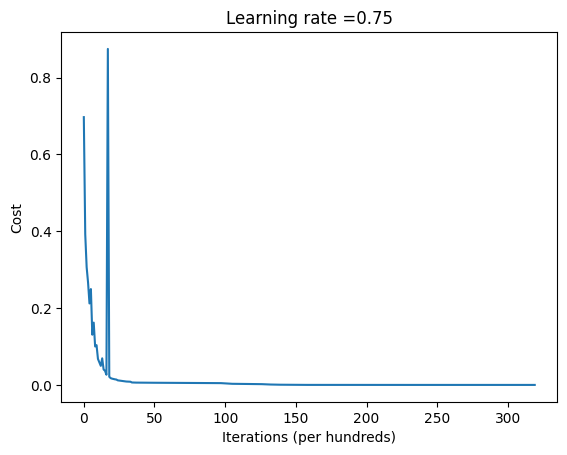

In [30]:
from helper_functions import plot_learning_curve

plot_learning_curve(costs, 0.75)

In [31]:

# Print train accuracy
train_predictions = predict(parameters, activations, X_train, decision_rate=0.5)

metrics(y_train.T, train_predictions.T)

Precision: 100.0 %
Recall: 100.0 %
Accuracy: 100.0 %


In [32]:
# Print dev accuracy
dev_predictions = predict(parameters, activations, X_dev, decision_rate=0.5)

metrics(y_dev.T, dev_predictions.T)

Precision: 97.3063973063973 %
Recall: 98.97260273972603 %
Accuracy: 98.16666666666667 %


In [33]:
test_predictions = predict(parameters, activations, X_test, decision_rate=0.5)

metrics(y_test.T, test_predictions.T)

Precision: 98.0327868852459 %
Recall: 98.67986798679867 %
Accuracy: 98.33333333333333 %
